# AMEO_DATASET_ANALYSIS
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features.

Our objective is to prove these hypothesis:  
**- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.**  
**- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)**

## Importing dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel(r'aspiring_minds_2015.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.shape

(3998, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [5]:
df['Unnamed: 0'].unique()

array(['train'], dtype=object)

In [6]:
# since there is only one category in unnamed- lets drop this column
#we can also drop college ID since that information is not needed now
df.drop(['Unnamed: 0','CollegeID','ID'],inplace = True,axis = 1)

## Exploratory Data Analysis

In [7]:
num_columns = df.select_dtypes(include = ['int','float']).columns.to_list()

In [8]:
#  There are some categorical columns above so lets remove that
columns_to_remove = ['12graduation','CollegeCityID','CollegeTier','CollegeCityTier','GraduationYear']
for column in columns_to_remove:
    num_columns.remove(column)

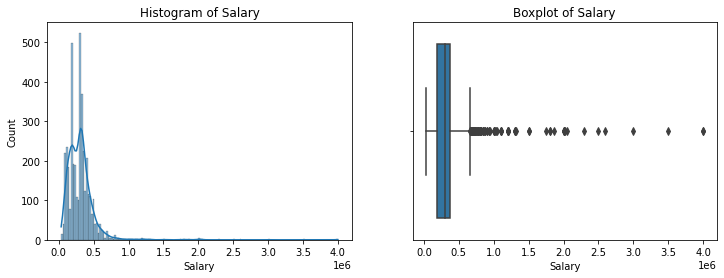

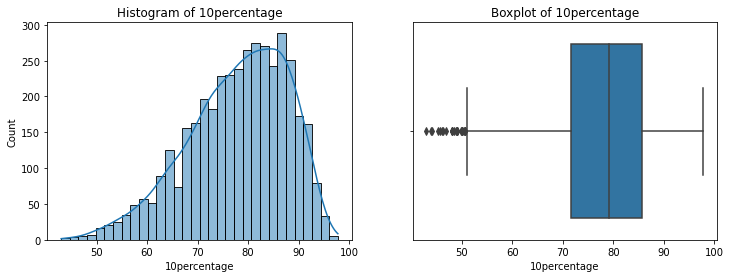

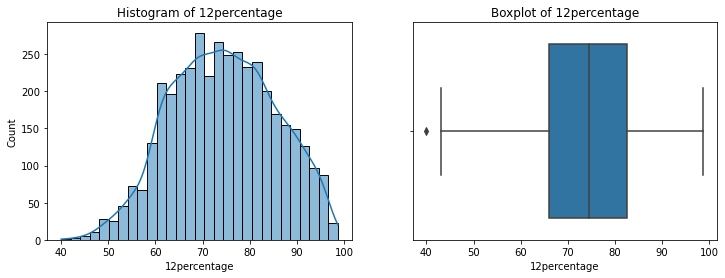

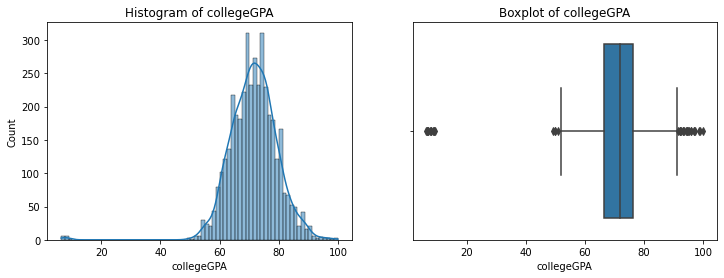

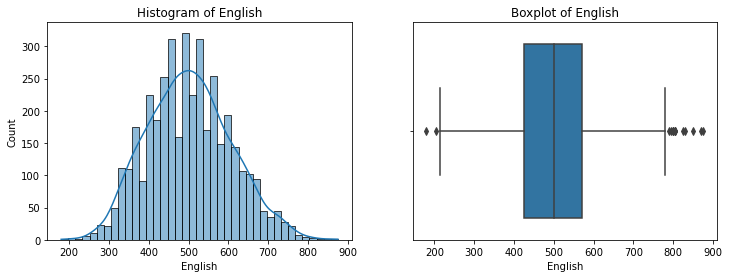

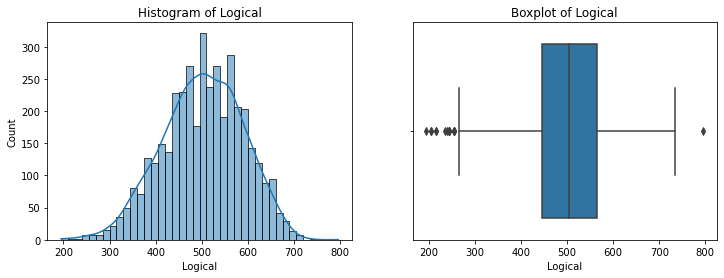

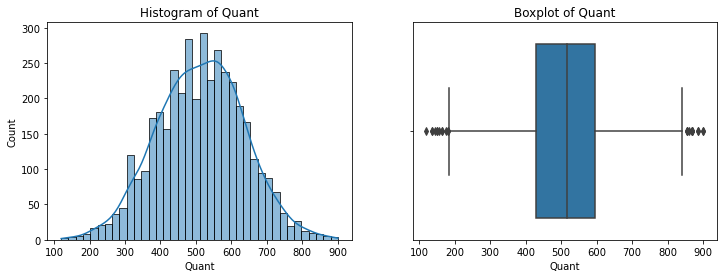

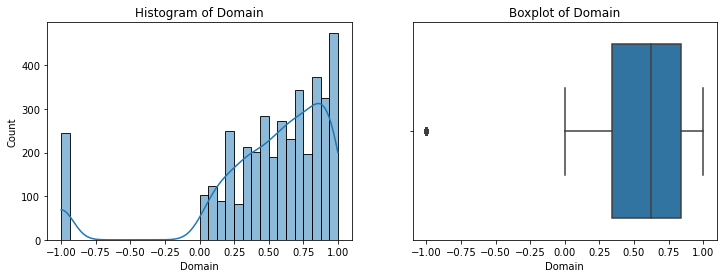

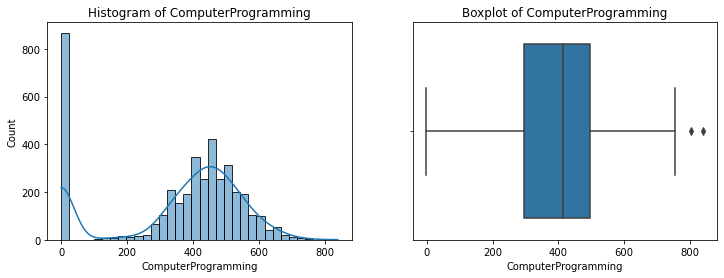

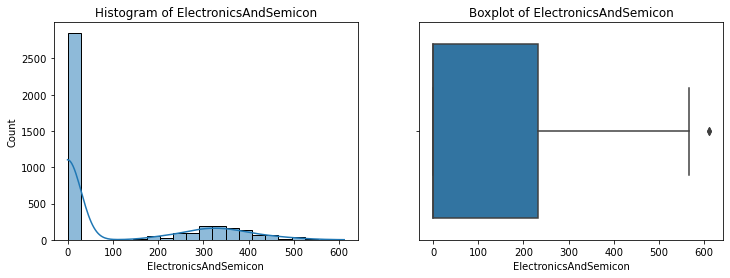

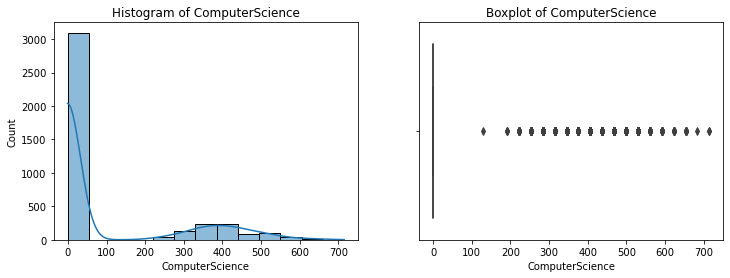

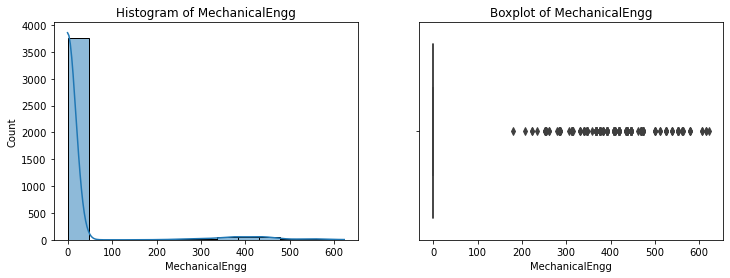

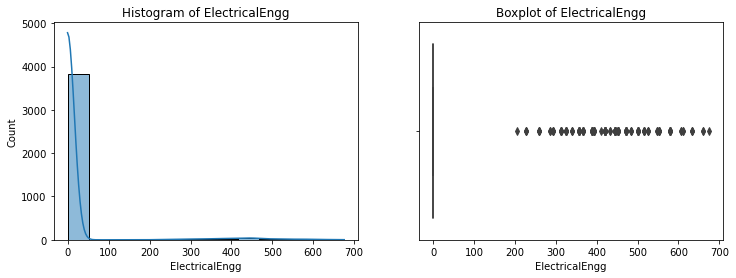

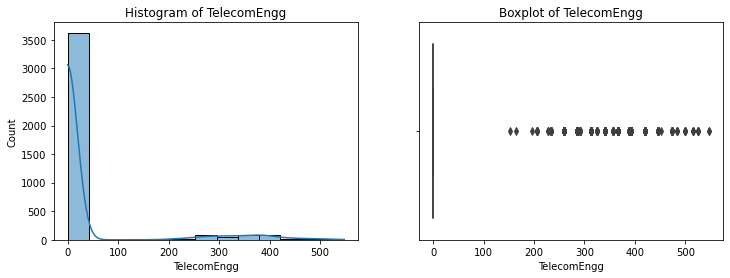

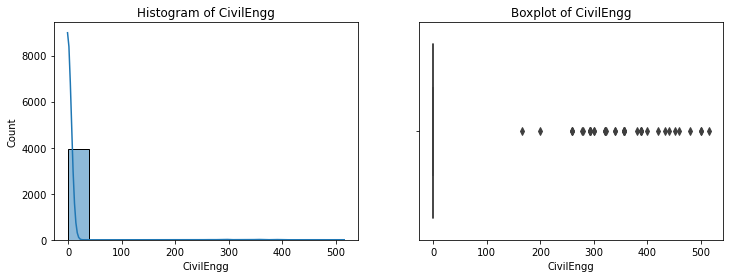

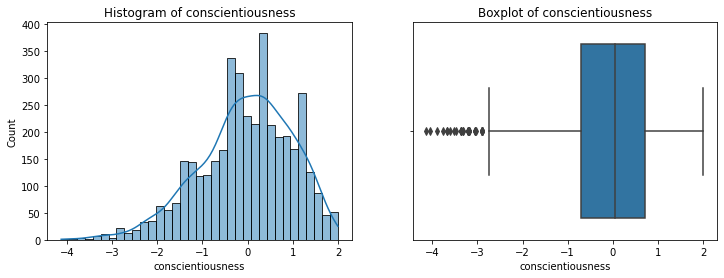

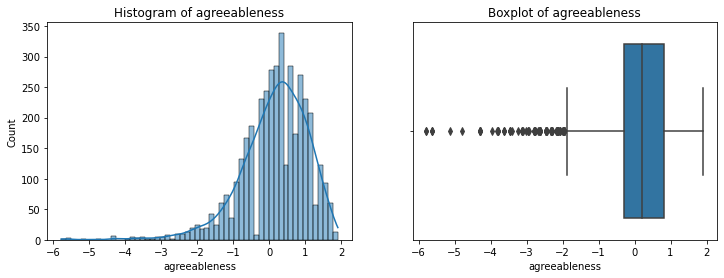

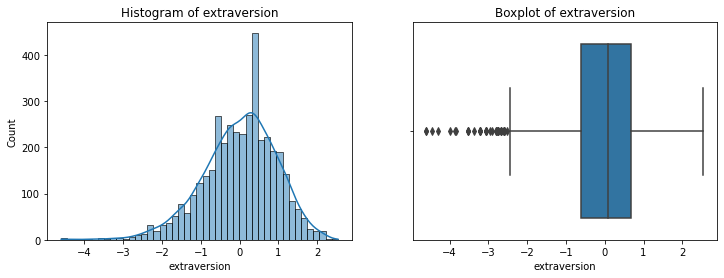

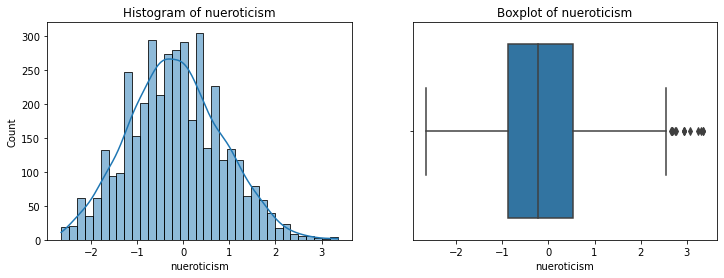

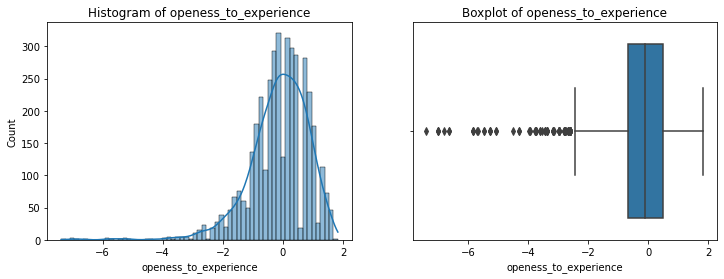

In [9]:
def eda_for_num(col_arr):
    for col in col_arr:
        fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
        sns.histplot(data=df, x=col, kde=True, ax=axs[0])
        sns.boxplot(data=df, x=col, ax=axs[1])
        axs[0].set_title(f"Histogram of {col}")
        axs[1].set_title(f"Boxplot of {col}")
    plt.show()
eda_for_num(num_columns)

## OBSERVATION
* It is Natural that there exists outlliers in scoring and Salaries,Scores in one of the sections of AMCAT’s personality test  
* We need to check how many outliers are present in salary.
* Every Specialization Score in AMCAT’s Specialization section is having maximum frequency at 0 (first bin) only  

In [10]:
salary = df['Salary']
std = np.std(df["Salary"])
outliers = salary[(salary > 3 * std) | (salary < -3)]
print(f'There are {len(outliers)} outliers \nAnd the outliers are: \n{outliers.to_list()}')

There are 129 outliers 
And the outliers are: 
[1100000, 800000, 1500000, 640000, 1200000, 675000, 1860000, 660000, 700000, 785000, 700000, 690000, 700000, 1110000, 1200000, 1000000, 715000, 820000, 720000, 2600000, 715000, 655000, 800000, 645000, 1025000, 775000, 645000, 1300000, 3500000, 910000, 730000, 680000, 1300000, 1050000, 2000000, 700000, 860000, 800000, 800000, 690000, 4000000, 2020000, 650000, 650000, 650000, 700000, 700000, 760000, 800000, 870000, 2050000, 700000, 1320000, 755000, 880000, 3000000, 650000, 700000, 650000, 720000, 820000, 2500000, 655000, 650000, 2300000, 950000, 1300000, 1200000, 4000000, 700000, 700000, 1800000, 725000, 1200000, 720000, 700000, 930000, 650000, 680000, 1000000, 750000, 1000000, 705000, 1745000, 2000000, 1800000, 850000, 845000, 700000, 660000, 820000, 750000, 1200000, 670000, 1030000, 770000, 800000, 720000, 900000, 1210000, 650000, 650000, 1500000, 1100000, 680000, 675000, 700000, 800000, 640000, 700000, 2000000, 2000000, 810000, 925000, 72

In [11]:
cat_columns = df.select_dtypes(['object']).columns.to_list()
for i in ['DOL','10board','12board']:
    cat_columns.remove(i)
cat_columns

['Designation',
 'JobCity',
 'Gender',
 'Degree',
 'Specialization',
 'CollegeState']

## The Top 5 specialization's based on average of salaries

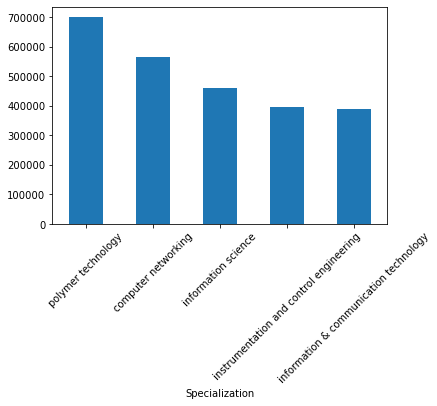

In [12]:
ax = df.groupby(by = ['Specialization'])['Salary'].mean().sort_values(ascending = False)[0:5].plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## The Top 5 Designation's based on average of salaries

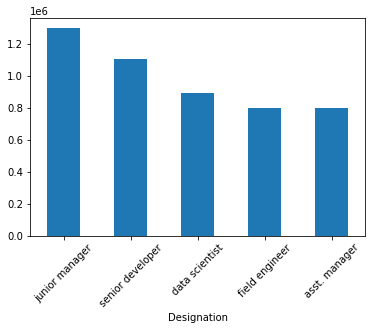

In [13]:
ax = df.groupby(by = ['Designation'])['Salary'].mean().sort_values(ascending = False)[0:5].plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## The Top 5 JobCity's based on average of salaries

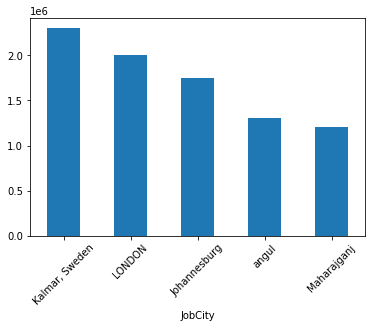

In [14]:
ax = df.groupby(by = ['JobCity'])['Salary'].mean().sort_values(ascending = False)[0:5].plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

##  Genders visualization based on average of salaries

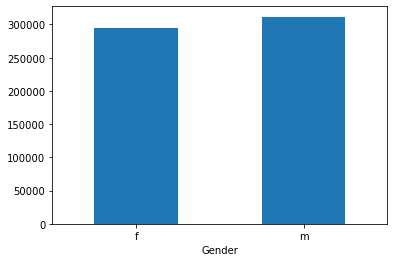

In [15]:
ax = df.groupby(by = ['Gender'])['Salary'].mean().sort_values().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

##  Degree's based on average of salaries

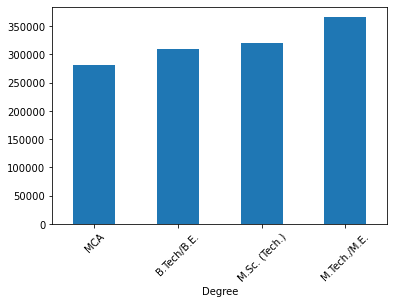

In [16]:
ax = df.groupby(by = ['Degree'])['Salary'].mean().sort_values().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## Top 5 College's states based on average of salaries

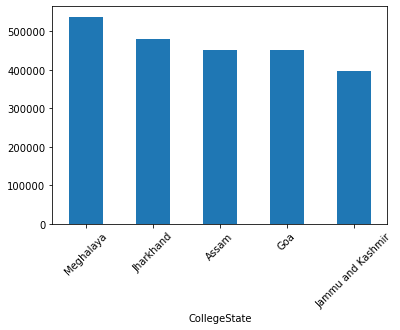

In [17]:
ax = df.groupby(by = ['CollegeState'])['Salary'].mean().sort_values(ascending = False)[:5].plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

## Hypothesis 1

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

> For this hypothesis since it is saying fresh graduates, we have to assume graduate year, and date of joining is same or +1 year than graduate year then they are freshers. 

In [18]:
df1 = df[df['Specialization']== 'computer science & engineering']

In [19]:
df1['DOJ'] = df1['DOJ'].apply(lambda x : x.year)

C:\Users\USER\AppData\Local\Temp\ipykernel_15620\4287567219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DOJ'] = df1['DOJ'].apply(lambda x : x.year)


In [20]:
fresher_df = df1.loc[df1['DOJ'] == df1['GraduationYear']]

In [21]:
fresher_df['Designation'].str.contains('Hard').sum()

0

In [22]:
fresher_df['Designation'].value_counts()

software engineer                        82
software developer                       47
java software engineer                   21
java developer                           21
technical support engineer               18
programmer analyst                       14
system engineer                          14
web developer                            12
software test engineer                   12
php developer                            11
associate software engineer              10
systems engineer                         10
test engineer                             8
android developer                         8
business analyst                          8
application developer                     7
engineer                                  6
ios developer                             6
software quality assurance tester         5
.net developer                            5
assistant system engineer                 5
project engineer                          4
asp.net developer               

In [23]:
l =  ['programmer analyst','software engineer', 'engineer' ,'associate engineer']
dict1 = dict(zip(l,['x','x','x','x']))

In [24]:
dict1

{'programmer analyst': 'x',
 'software engineer': 'x',
 'engineer': 'x',
 'associate engineer': 'x'}

In [25]:
#replacing designation for our hypothesis as same to determing there salary range
fresher_df['Designation'] = fresher_df['Designation'].map(dict1)

C:\Users\USER\AppData\Local\Temp\ipykernel_15620\3893613649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fresher_df['Designation'] = fresher_df['Designation'].map(dict1)


In [26]:
fresher_df['Designation'].value_counts()

x    103
Name: Designation, dtype: int64

In [27]:
fresher_df.dropna(inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15620\3365051349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fresher_df.dropna(inplace = True)


In [28]:
fresher_df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,335000,2014,2015-06-01 00:00:00,x,Hyderabad,m,1993-06-28,88.00,state board,2010,90.00,state board,2,B.Tech/B.E.,computer science & engineering,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,340000,2014,2015-04-01 00:00:00,x,Bangalore,m,1992-10-23,77.20,state board,2010,86.10,state board,2,B.Tech/B.E.,computer science & engineering,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889
48,390000,2013,present,x,Bangalore,m,1991-02-28,86.60,cbse,2009,75.00,cbse,2,B.Tech/B.E.,computer science & engineering,74.00,11637,0,Madhya Pradesh,2013,505,545,565,0.356536,475,-1,346,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024
55,250000,2014,present,x,Mangalore,m,1992-02-13,90.80,state board,2010,90.10,state board,2,B.Tech/B.E.,computer science & engineering,67.70,12832,0,Karnataka,2014,525,530,595,0.486747,485,-1,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.16010,-0.4776
115,330000,2013,2015-04-01 00:00:00,x,Chennai,m,1992-01-13,76.17,state board,2009,72.00,cbse,2,B.Tech/B.E.,computer science & engineering,78.00,10991,0,Rajasthan,2013,510,535,605,0.819417,505,-1,-1,-1,-1,-1,-1,0.4155,-0.7866,-1.2196,1.16010,-1.8189
130,325000,2014,present,x,Greater Noida,m,1992-01-10,82.80,cbse,2009,73.60,cbse,2,B.Tech/B.E.,computer science & engineering,67.50,3918,1,Karnataka,2014,520,450,575,0.744758,545,-1,438,-1,-1,-1,-1,-0.1590,0.0459,0.7785,-1.12180,-0.0943
168,375000,2014,2015-04-01 00:00:00,x,Noida,m,1993-03-28,85.80,cbse,2010,78.40,cbse,1,B.Tech/B.E.,computer science & engineering,77.56,47,1,Delhi,2014,530,595,340,0.842248,485,-1,469,-1,-1,-1,-1,1.2772,1.2114,-2.1418,-1.75560,-0.6692
275,305000,2014,present,x,-1,m,1993-03-01,88.60,state board,2010,92.00,state board,2,B.Tech/B.E.,computer science & engineering,73.00,14342,0,Andhra Pradesh,2014,875,510,500,0.744758,485,-1,438,-1,-1,-1,-1,-0.0154,0.3789,0.1637,0.01920,0.2889
290,560000,2014,present,x,Bangalore,m,1991-12-17,89.42,icse,2009,81.20,cbse,2,B.Tech/B.E.,computer science & engineering,71.26,4971,0,Uttar Pradesh,2014,650,555,705,0.819417,505,-1,-1,-1,-1,-1,-1,-0.8772,0.2124,-1.5270,0.14590,-1.2440
328,785000,2014,present,x,Bangalore,m,1991-10-20,84.83,cbse,2009,78.43,cbse,1,B.Tech/B.E.,computer science & engineering,70.66,1887,0,Uttar Pradesh,2014,570,540,655,0.952246,585,-1,-1,-1,-1,-1,-1,0.7027,1.0449,1.5470,-1.62890,-0.6692


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

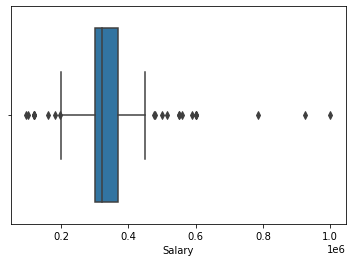

In [29]:
sns.boxplot(fresher_df['Salary'])

In [30]:
fresher_df['Salary'].describe()

count        103.000000
mean      345776.699029
std       144930.269375
min        95000.000000
25%       300000.000000
50%       320000.000000
75%       367500.000000
max      1000000.000000
Name: Salary, dtype: float64

We have outliers and a distribution, we will use the one-sample t-test to test whether the mean of the distribution is within the given range (2.5-3 lpa) or not.

The null hypothesis for the one-sample t-test is that the mean of the population (salary distribution) is equal to a certain value (in your case, it is the midpoint of the given range, i.e., (2.5+3)/2 = 2.75 lpa). The alternative hypothesis is that the mean of the population is not equal to the specified value.

In [31]:
fresher_df['Salary']

24       335000
31       340000
48       390000
55       250000
115      330000
130      325000
168      375000
275      305000
290      560000
328      785000
351      330000
432      475000
462      240000
499      300000
550      450000
615      160000
696      320000
723      420000
819      350000
834      310000
958      420000
965      335000
972      515000
976      350000
978      275000
1003     300000
1059     325000
1088     450000
1163     120000
1224     275000
1290     400000
1300     275000
1303     450000
1317     350000
1343     305000
1384     120000
1390     305000
1494     315000
1529     450000
1641     120000
1651     330000
1653     300000
1664     225000
1743     200000
1803     330000
1855     340000
1861     400000
1868     300000
1920     315000
1926     310000
1946     200000
1949     320000
1974     600000
1990     320000
2040     590000
2077     305000
2118     310000
2132     300000
2194     335000
2227     350000
2236     240000
2354     550000
2391    

In [32]:
from scipy.stats import ttest_1samp

# Assume that your salary distribution is stored in a NumPy array 'salaries'
# Calculate the mean and standard deviation of the distribution
mean = np.mean(fresher_df['Salary'])
std_dev = np.std(fresher_df['Salary'])

# Set the hypothesized mean value (i.e., midpoint of the given range)
hypo_mean = 2.75

t_statistic, p_value = ttest_1samp(fresher_df['Salary'], hypo_mean)

# Check the p-value and reject or fail to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Mean salary is not within the given range.")
else:
    print("Fail to reject the null hypothesis. Mean salary is within the given range.")


Reject the null hypothesis. Mean salary is not within the given range.


### Reject the null hypothesis. Mean salary is not within the given range.

## Hypothesis 2

->
Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

To test this hypothesis, you can perform a Chi-square test of independence.

In [33]:
import scipy.stats as stats

# Cross-tabulate gender and specialization
cross_tab = pd.crosstab(fresher_df['Gender'], df['Specialization'])

# Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(cross_tab)

# Print the test results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Mean salary is not within the given range.")
else:
    print("Fail to reject the null hypothesis.")


Chi-square statistic: 0.00
P-value: 1.0000
Degrees of freedom: 0
Fail to reject the null hypothesis.


### Therefore, we can conclude that there is no significant relationship between gender and specialization. In other words, the preference of specialization does not depend on gender.

## Feature Transformation

In [34]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.to_list()
#since there are some cat columns that are labeled aready
to_remove = ['12graduation','CollegeTier','CollegeCityID','CollegeCityTier']
for col in to_remove:
    num_cols.remove(col)
scalar = StandardScaler()
df[num_cols] = scalar.fit_transform(df[num_cols])

In [35]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.to_list()
cat_cols.remove('DOL')

In [36]:
for col in cat_cols:
    if df[col].nunique() <=2:
        print(col)

Gender


In [37]:
#So lets label encode gender 
dict2 = {'m':1,'f':0} #based on avg salaries
df['Gender'] = df['Gender'].map(dict2)

In [38]:
dummy_cols = pd.get_dummies(df[cat_cols])
for col in cat_cols:
    del df[col]
df = pd.concat([df, dummy_cols], axis=1)


In [39]:
df.shape

(3998, 1478)

In [40]:
df.head()

,Salary,DOJ,DOL,DOB,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender,Designation_.net developer,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,Designation_android developer,Designation_application developer,Designation_application engineer,Designation_apprentice,Designation_ase,Designation_asp.net developer,Designation_assistant administrator,Designation_assistant electrical engineer,Designation_assistant engineer,Designation_assistant manager,Designation_assistant professor,Designation_assistant programmer,Designation_assistant software engineer,Designation_assistant store manager,Designation_assistant system engineer,Designation_assistant system engineer - trainee,Designation_assistant system engineer trainee,Designation_assistant systems engineer,Designation_associate developer,Designation_associate engineer,Designation_associate manager,Designation_associate qa,Designation_associate software developer,Designation_associate software engg,Designation_associate software engineer,Designation_associate system engineer,Designation_associate technical operations,Designation_associate test engineer,Designation_asst. manager,Designation_automation engineer,Designation_branch manager,Designation_bss engineer,Designation_business analyst,Designation_business analyst consultant,Designation_business consultant,Designation_business development executive,Designation_business development manager,Designation_business development managerde,Designation_business intelligence analyst,Designation_business office manager,Designation_business process analyst,Designation_business system analyst,Designation_business systems analyst,Designation_business systems consultant,Designation_business technology analyst,Designation_c# developer,Designation_cad designer,Designation_cad drafter,Designation_catalog associate,Designation_civil engineer,Designation_clerical,Designation_clerical assistant,Designation_client services associate,Designation_cloud engineer,Designation_cnc programmer,Designation_co faculty,Designation_computer faculty,Designation_continuous improvement engineer,Designation_controls engineer,Designation_corporate recruiter,Designation_customer care executive,Designation_customer service,Designation_customer service manager,Designation_customer service representative,Designation_customer support engineer,Designation_data analyst,Designation_data entry operator,Designation_data scientist,Designation_database administrator,Designation_database developer,Designation_db2 dba,Designation_dba,Designation_dcs engineer,Designation_delivery software engineer,Designation_design engineer,Designation_designer,Designation_desktop support analyst,Designation_desktop support engineer,Designation_desktop support technician,Designation_developer,Designation_digital marketing specialist,Designation_documentation specialist,Designation_dotnet developer,Designation_editor,Designation_educator,Designation_electrical controls engineer,Designation_electrical design engineer,Designation_electrical designer,Designation_electrical engineer,Designation_electrical field engineer,Designation_electrical project engineer,Designation_electronic field service engineer,Designation_embedded engineer,Designation_embedded software engineer,Designation_engineer,Designation_engineer trainee,Designation_engineer- customer support,Designation_engineer-hws,Designation_engineering manager,Designation_engineering technician,Designation_enterprise solutions developer,Designation_entry level management trainee,Designation_entry leve